In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
2002-01-01,117.144,2002,1,50091.000000,1.825653e+08,4.2,177.7,5.7,72.016492,142.0,1.73,79.4,109297.0,65820.0,24.183,12.3
2002-02-01,117.845,2002,2,50156.000000,1.827970e+08,4.0,178.0,5.7,72.333310,142.2,1.74,79.4,109297.0,65820.0,24.183,12.3
2002-03-01,118.687,2002,3,50221.000000,1.830774e+08,4.1,178.5,5.7,72.132190,143.2,1.73,79.4,109297.0,65820.0,24.183,12.3
2002-04-01,119.611,2002,4,50286.000000,1.832597e+08,4.3,179.3,5.9,71.915086,143.5,1.75,79.4,109297.0,65820.0,24.183,12.3
2002-05-01,120.724,2002,5,50311.333333,1.835085e+08,4.0,179.5,5.8,72.025945,143.8,1.75,79.4,109297.0,65820.0,24.183,12.3


In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

#### Analysis

Looking  at the correlation among the variables

In [4]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
CSUSHPISA,1.000000,0.904325,0.619826,0.177683,0.822250,-0.475602,0.199060,0.898972,0.113791,0.788002,0.748972,0.831509,0.845065,0.842396
Per_Capita_GDP,0.904325,1.000000,0.852635,0.077429,0.947442,-0.429201,0.007277,0.918006,-0.104593,0.950643,0.937878,0.847308,0.931397,0.952848
working_age_pop,0.619826,0.852635,1.000000,0.170013,0.925836,-0.083678,-0.398884,0.792096,-0.359215,0.936732,0.961765,0.584117,0.871936,0.844363
Houses,0.177683,0.077429,0.170013,1.000000,0.163135,0.066492,0.010640,0.224787,0.208913,0.054384,0.062175,-0.026669,0.126974,-0.018136
CPI,0.822250,0.947442,0.925836,0.163135,1.000000,-0.197401,-0.236131,0.949469,-0.303169,0.979497,0.974588,0.714312,0.971241,0.957735
UNRATE,-0.475602,-0.429201,-0.083678,0.066492,-0.197401,1.000000,-0.848690,-0.247495,-0.514168,-0.205556,-0.210063,-0.489301,-0.137417,-0.272655
EmpRate,0.199060,0.007277,-0.398884,0.010640,-0.236131,-0.848690,1.000000,-0.109846,0.708571,-0.248226,-0.266346,0.228733,-0.247729,-0.138451
Cons_Material,0.898972,0.918006,0.792096,0.224787,0.949469,-0.247495,-0.109846,1.000000,-0.225555,0.896159,0.874035,0.684269,0.936650,0.910000
FEDFUNDS,0.113791,-0.104593,-0.359215,0.208913,-0.303169,-0.514168,0.708571,-0.225555,1.000000,-0.339059,-0.339510,0.081261,-0.315860,-0.306734
urban_pop_us,0.788002,0.950643,0.936732,0.054384,0.979497,-0.205556,-0.248226,0.896159,-0.339059,1.000000,0.993336,0.774169,0.968039,0.977065


In [5]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

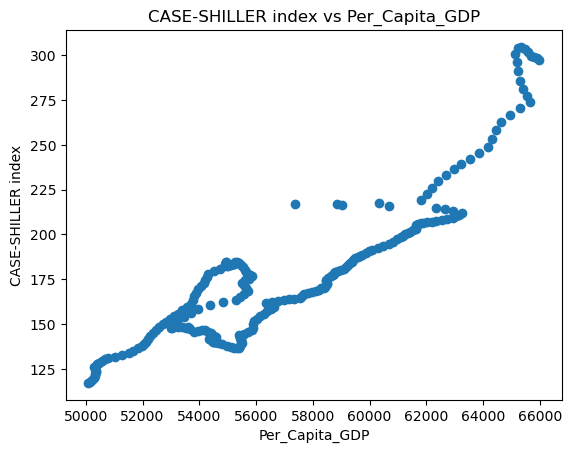

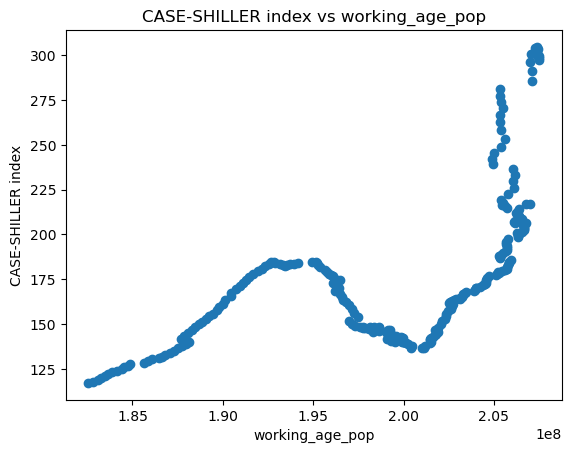

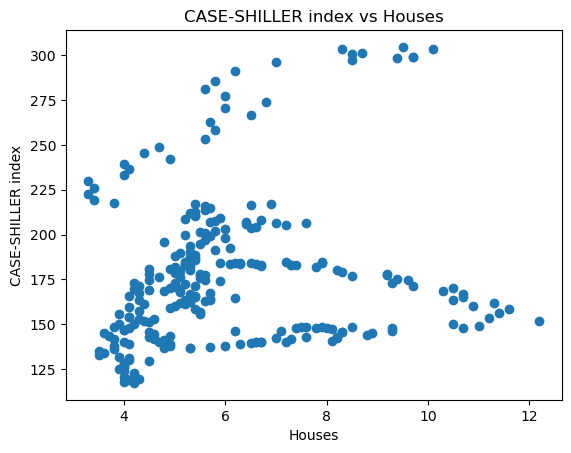

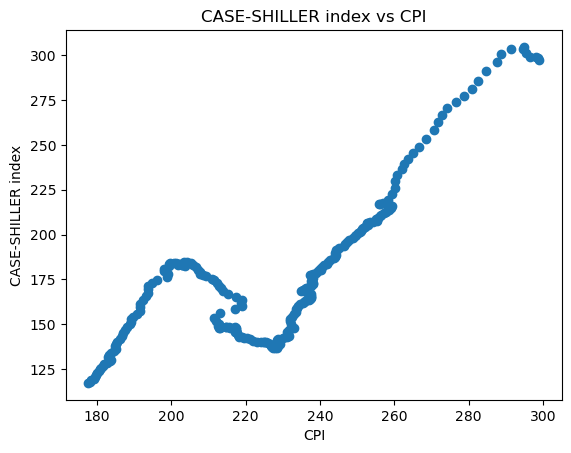

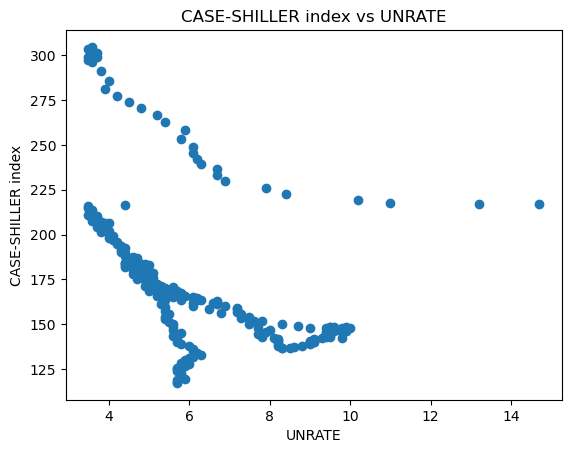

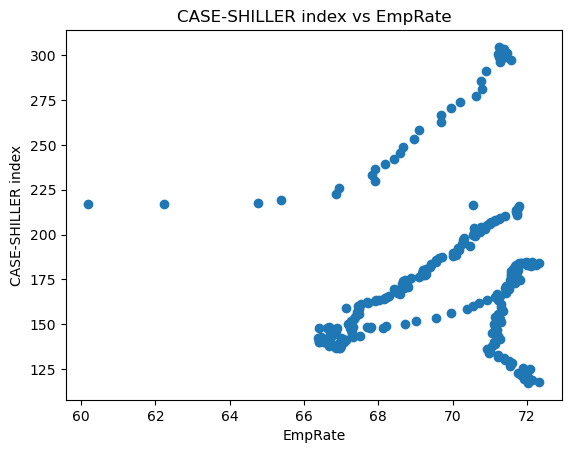

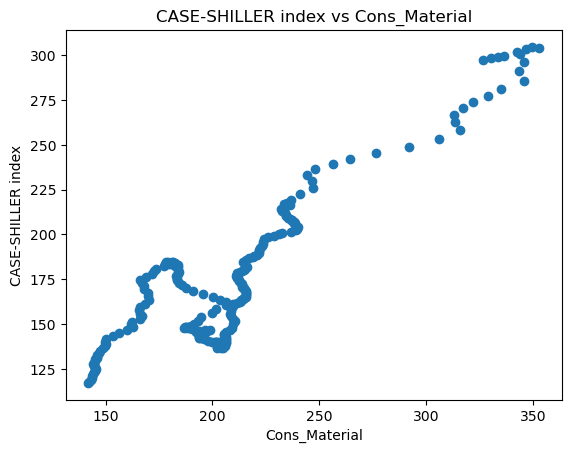

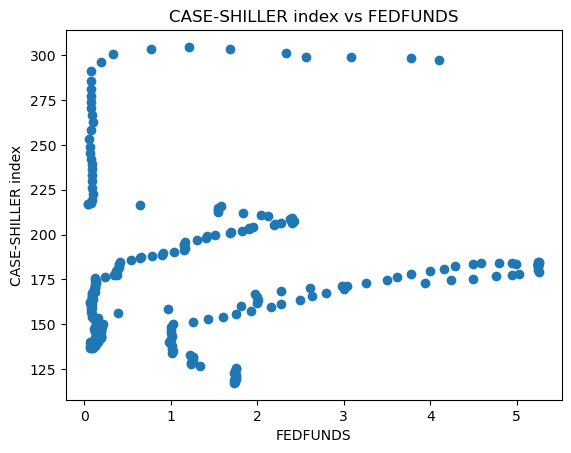

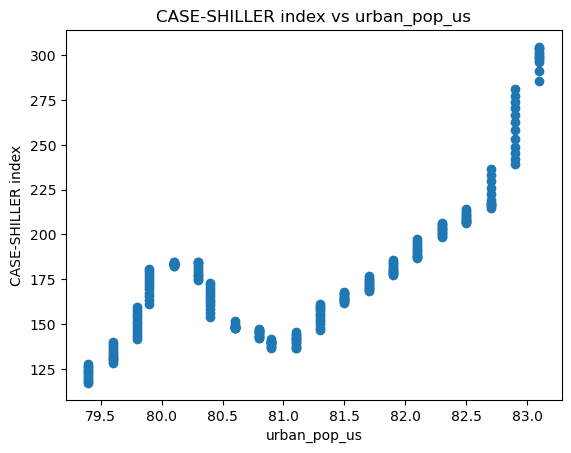

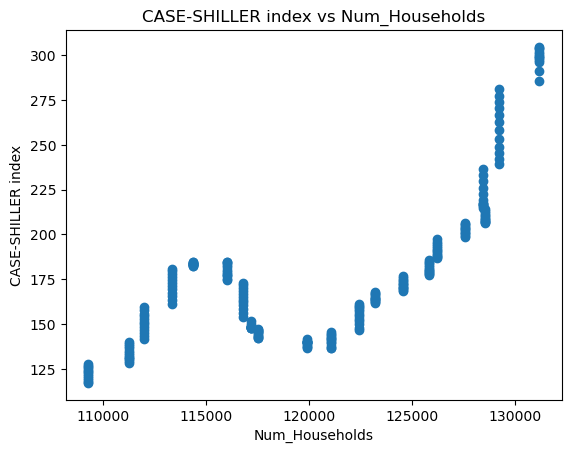

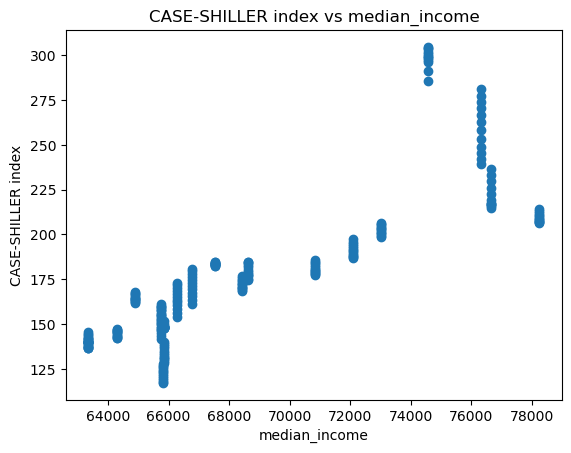

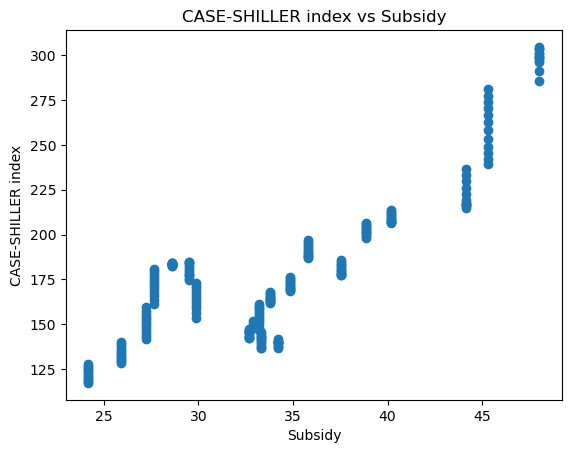

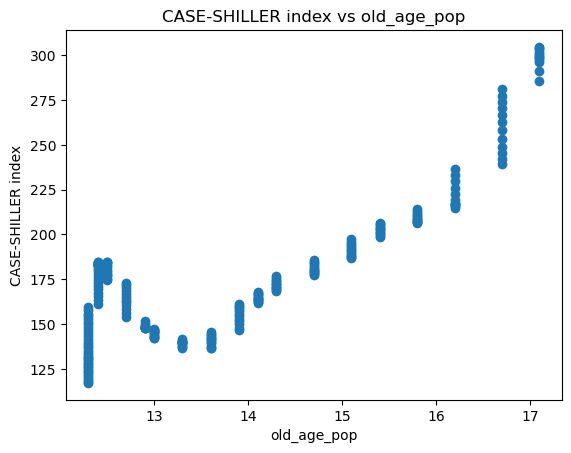

In [6]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-

- Unemployment rate is negatively correlated with the home prices. Which makes sense.
- Number of new houses has almost 0 correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
- Impact of the great recession is reflected in almost all the plots.
- Interest rates have a slight negative impact on the home prices.
- All the other variables are positively correlated with the home prices.

From the correlation matrix above, it can be seen that several pairs of independent variables have high correlation. Dropping one column from each such pair as they will cause multicollinearity. I will drop the column which has lower correlation with the target

### Model Building

In [8]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [9]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [10]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9598783769452495


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [13]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 66.07492938414562
The coefficient for working_age_pop is 0.5891439011495049
The coefficient for Houses is 5.116048214820116
The coefficient for CPI is -10.338863224106461
The coefficient for UNRATE is -99.84128283452215
The coefficient for EmpRate is -106.7622073603103
The coefficient for Cons_Material is 117.50260786853474
The coefficient for FEDFUNDS is 27.686139778865456
The coefficient for urban_pop_us is -45.14684554408051
The coefficient for Num_Households is -115.61992257902862
The coefficient for median_income is 33.426807831651224
The coefficient for Subsidy is 83.42213202723786
The coefficient for old_age_pop is 29.02166761923049


In [14]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  237.13266820549728


As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model,I can directly study the impact of variables on the home price index using the scatter plots.

A few variables that could have been studied are below.

- Net-immigration (It is supposed to have a positive impact. No suitable data could be found)
- Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)
- Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)
- Tax Rate (Too many brackets (7) and could not analyse due to time)
- Number of active listings (Data prior to 2017 was not found)